In [2]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('iris.csv')
df["Iris-setosa"] = df["Iris-setosa"].replace("Iris-setosa",0)
df["Iris-setosa"] = df["Iris-setosa"].replace("Iris-versicolor",1)
df["Iris-setosa"] = df["Iris-setosa"].replace("Iris-virginica",2)
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
5,4.6,3.4,1.4,0.3,0
6,5.0,3.4,1.5,0.2,0
7,4.4,2.9,1.4,0.2,0
8,4.9,3.1,1.5,0.1,0
9,5.4,3.7,1.5,0.2,0


In [6]:
test_frac = 0.3
test = df.sample(frac=test_frac)
x_test = pd.DataFrame(test.iloc[:,:4])
y_test = pd.DataFrame(test.iloc[:,4])

train = df.loc[~(df.index.isin(test.index))]
x_train = pd.DataFrame(train.iloc[:,:4])
y_train = pd.DataFrame(train.iloc[:,4])
print(df.shape, test.shape, train.shape)

(149, 5) (45, 5) (104, 5)


In [7]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
predictions = logreg.predict(x_test)
score = logreg.score(x_test, y_test)
score

C:\Users\IITNR\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IITNR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\IITNR\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9333333333333333

In [8]:
predictions

array([1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0,
       0, 0, 1, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 1, 2, 0, 1, 1, 0, 1,
       0], dtype=int64)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [10]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[19  0  0]
 [ 0 11  3]
 [ 0  0 12]]


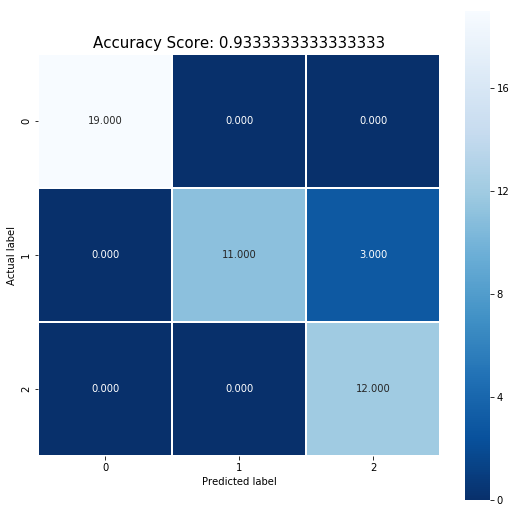

In [11]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# ROC and AUC for Multiclass Classification

In [34]:
# print(type(y_test))
def multi_class_roc(y_test,predictions,nc):
#     print(y_test,predictions)
    roc_list = []
    auc_list = []
    for i in range(nc):
        tempy = y_test
        ptemp = pd.DataFrame(predictions)
        tempy = tempy.replace(i,-1)
        ptemp = ptemp.replace(i,-1)
        for j in range(nc):
            tempy = tempy.replace(j,0)
            ptemp = ptemp.replace(j,0)
        tempy = tempy.replace(-1,1)
        ptemp = ptemp.replace(-1,1)
#         print(tempy,ptemp)
        fpr,tpr,thresholds = metrics.roc_curve(tempy,ptemp)
        ras = metrics.roc_auc_score(tempy,ptemp)
        roc_list.append([fpr,tpr])
        auc_list.append(ras)
    return roc_list,auc_list

In [35]:
rl,al = multi_class_roc(y_test,predictions,3)
rl

[[array([0., 0., 1.]), array([0., 1., 1.])],
 [array([0., 0., 1.]), array([0.        , 0.78571429, 1.        ])],
 [array([0.        , 0.09090909, 1.        ]), array([0., 1., 1.])]]

ROC Curve for Class 0  VS All Others


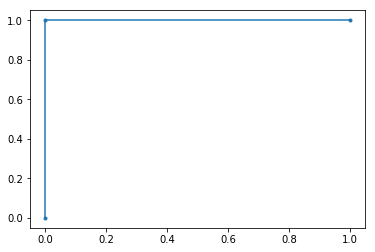

ROC Curve for Class 1  VS All Others


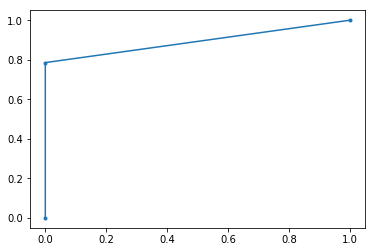

ROC Curve for Class 2  VS All Others


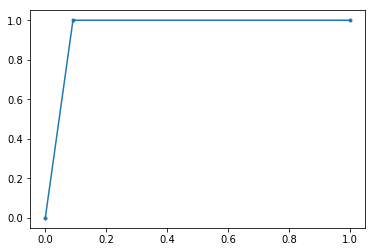

In [38]:
import matplotlib.pyplot as plt
j = 0
for i in rl:
    print("ROC Curve for Class",j," VS All Others")
    j+=1
    plt.plot(i[0], i[1], marker='.')
    plt.show()

In [37]:
al

[1.0, 0.8928571428571428, 0.9545454545454545]